# Books

In [23]:
import pandas as pd
import numpy as np
import itertools

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import loguniform, beta, uniform

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline

import missingno as msno

import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import f_classif, f_regression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC
import seaborn as sns

warnings.filterwarnings('ignore')

In [24]:
df_clean = pd.read_csv('Books_Data_Clean.csv')

__Getting Familiar with the Columns:__

* Book Name: The title of each book.
* Author: The name of the author who wrote the book.
* language_code: The code representing the language in which the book is written.
* Author_Rating: The rating assigned to the author based on their previous works.
* Book_average_rating: The average rating given to the book by readers.
* Book_ratings_count: The number of ratings given to the book by readers.
* genre: The genre or category to which the book belongs.
* gross sales: The total sales revenue generated by each book.
* publisher revenue: The revenue earned by publishers from selling each book.
* sale price: The price at which each copy of a book is sold.
* sales rank: A numeric value indicating a book's rank based on its sales performance in comparison to other books within its category (genre).
* units sold : Total number of copies sold for each specific title.

In [26]:
df_clean.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [27]:
df_clean.shape

(1070, 15)

The __Target__ will be the feature __Author_Rating__, I will be trying to solve a __multiclass classification__ with 4 classes involved.
We visualize the unique values in the column here below
Via the Histogram we can also notice how imbalanced these classes are 

In [28]:
df_clean['Author_Rating'].unique()

array(['Novice', 'Intermediate', 'Famous', 'Excellent'], dtype=object)

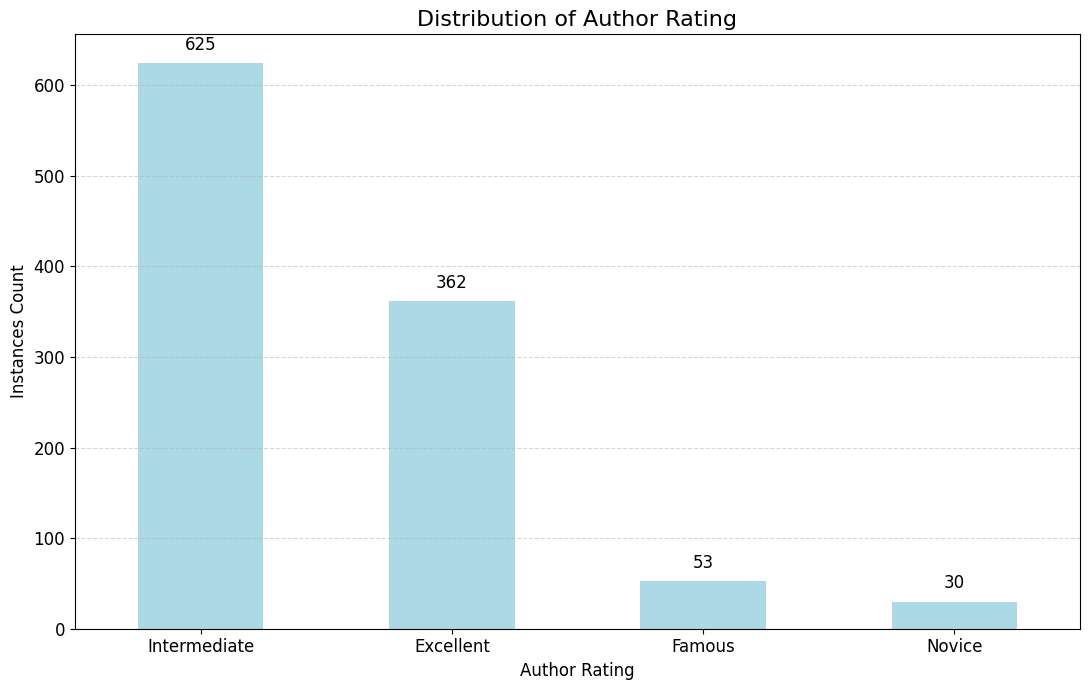

In [79]:
# Get the counts of each rating
rating_counts = df_clean['Author_Rating'].value_counts()

# Plot the distribution of ratings
plt.figure(figsize=(11, 7))  # Increase figure size
bar_plot = rating_counts.plot(kind='bar', color='lightblue')  # Adjust color
plt.title('Distribution of Author Rating', fontsize=16)  # Increase title font size
plt.ylabel('Instances Count', fontsize=12)  # Increase y-axis label font size
plt.xlabel('Author Rating', fontsize=12)  # Increase x-axis label font size

# Add labels to the bars
for i, count in enumerate(rating_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adjust grid appearance
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Below we show the __correlation heatmap__, a correlation heatmap is a powerful visualization tool that helps identify patterns and relationships between __numerical features__ in a dataset.

Each cell in the heatmap represents the correlation coefficient between two variables.
The correlation coefficient indicates the strength and direction of the linear relationship between the variables (e.g. as one variable increases or decreases, the other variable changes by a constant amount or percentage.). It ranges from __-1 to 1__, where:
* 1 indicates a perfect positive linear relationship,
* -1 indicates a perfect negative linear relationship, and
* 0 indicates no linear relationship.

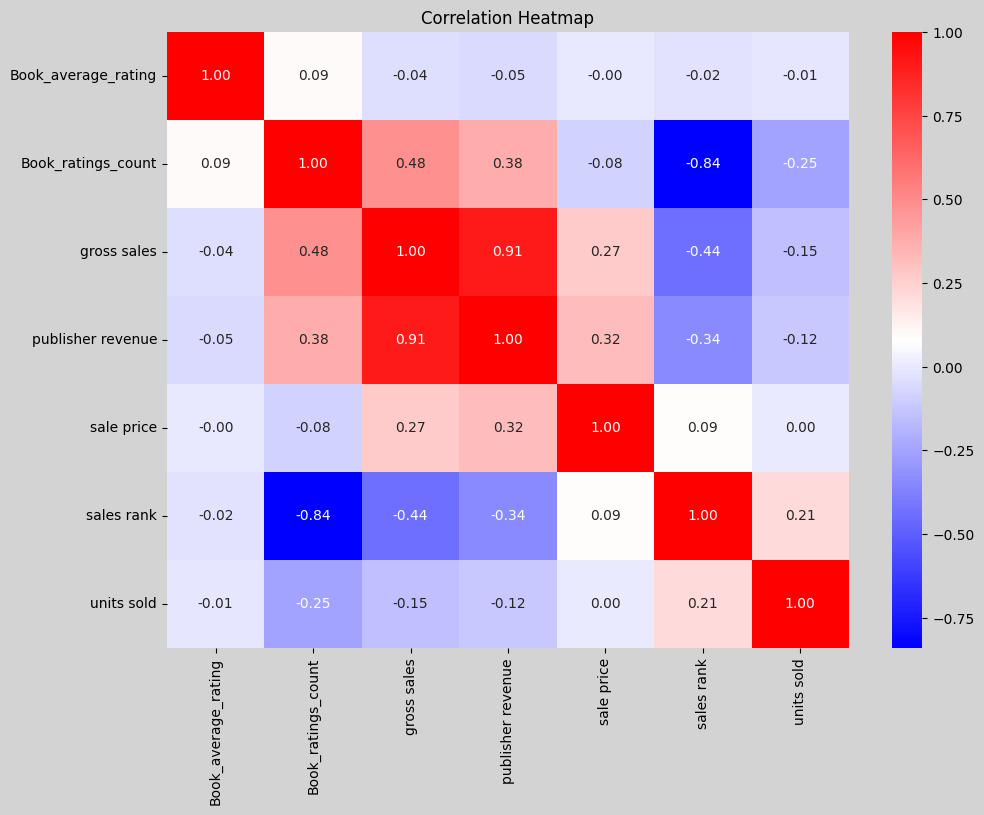

In [74]:
columns_to_include = ['Book_average_rating', 'Author_Rating', 'Book_ratings_count', 
                      'gross sales', 'publisher revenue', 'sale price', 'sales rank', 
                      'units sold']

# Calculate the correlation matrix
correlation_matrix = df_clean[columns_to_include].corr()

# Plot the correlation heatmap
plt.figure(figsize=(11, 8), facecolor='lightgrey')
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

With the scatter plot below we can visualize the relationship between the average rating of a book and the rating of the author

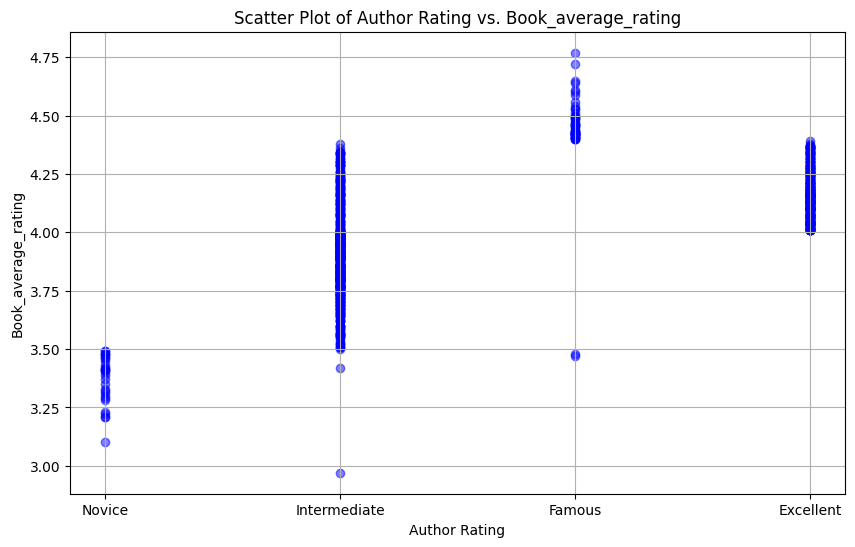

In [30]:

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Author_Rating'], df_clean['Book_average_rating'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Author Rating vs. Book_average_rating')
plt.xlabel('Author Rating')
plt.ylabel('Book_average_rating')
plt.grid(True)
plt.show()


In [31]:
df_clean.isnull().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

### Add missing values 

Since we see that there are close to none missing values in the dataset we add them in order to perform preprocessing later

In [75]:
def add_missing(col, amount):
    X = col.copy()
    size = amount if amount >= 1 else int(len(X) * amount)
    indexes = np.random.choice(len(X), size, replace = False )
    X[indexes] = np.nan
    return X

In [32]:
df_clean['Publishing Year'] = add_missing(df_clean['Publishing Year'], 0.04)
df_clean['Book Name'] = add_missing(df_clean['Book Name'], 0.05)
df_clean['Author'] = add_missing(df_clean['Author'], 0.03)
df_clean['language_code'] = add_missing(df_clean['language_code'], 0.06)
df_clean['Book_average_rating'] = add_missing(df_clean['Book_average_rating'], 0.02)
df_clean['Book_ratings_count'] = add_missing(df_clean['Book_ratings_count'], 0.08)
df_clean['genre'] = add_missing(df_clean['genre'], 0.09)
df_clean['gross sales'] = add_missing(df_clean['gross sales'], 0.01)
df_clean['publisher revenue'] = add_missing(df_clean['publisher revenue'], 0.02)
df_clean['sale price'] = add_missing(df_clean['sale price'], 0.01)
df_clean['sales rank'] = add_missing(df_clean['sales rank'], 0.13)
df_clean['Publisher '] = add_missing(df_clean['Publisher '], 0.08)
df_clean['units sold'] = add_missing(df_clean['units sold'], 0.01)

In [33]:
df_clean.to_csv('books_corr.csv')
df = pd.read_csv('books_corr.csv')

# Preprocessing

### Delete rows that have null values and convert them to integers

In [34]:
df = df[df['Publishing Year'] >= 0] # keeping only non-negative values for the publishing year

In [35]:
df['Publishing Year'] = df['Publishing Year'].astype(int) #Transforming the 'Years' from float to int

### Drop unwanted columns

In [36]:
df.drop(['Unnamed: 0', 'index', 'Publisher '], axis = 1, inplace = True) 

In [38]:
df

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,units sold
0,1975,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903.0,genre fiction,34160.00,20496.000,4.88,1.0,7000.0
1,1987,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267.0,genre fiction,12437.50,7462.500,1.99,2.0,6250.0
2,2015,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669.0,NaN,47795.00,28677.000,8.69,3.0,5500.0
3,2008,NaN,David Sedaris,en-US,Intermediate,4.04,150898.0,fiction,41250.00,NaN,7.50,NaN,5500.0
4,2011,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283.0,genre fiction,37952.50,22771.500,7.99,NaN,4750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2014,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379.0,nonfiction,104.94,62.964,0.99,1268.0,106.0
1066,1989,The Power of One,Bryce Courtenay,eng,Excellent,NaN,57312.0,genre fiction,846.94,508.164,7.99,1270.0,106.0
1067,1930,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742.0,NaN,846.94,508.164,7.99,1271.0,106.0
1068,2011,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028.0,NaN,104.94,62.964,0.99,NaN,106.0


<AxesSubplot: >

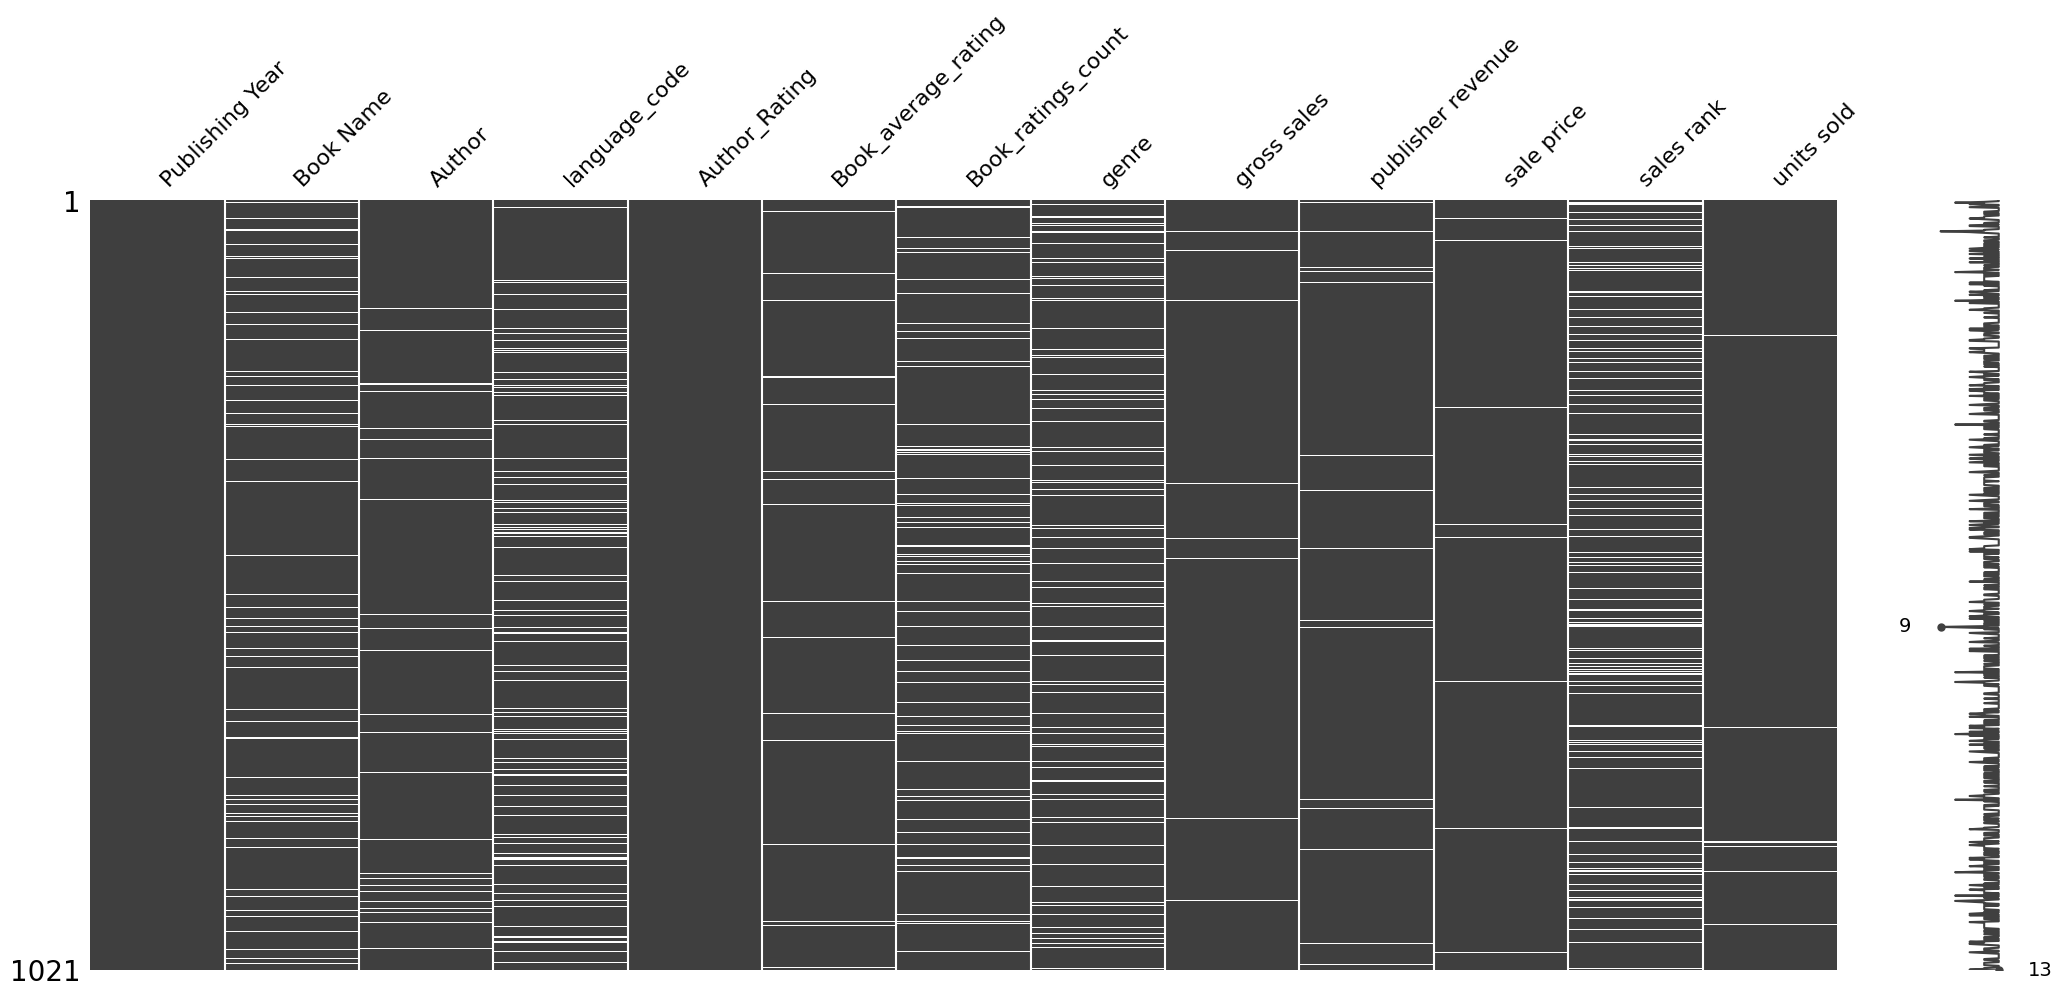

In [39]:
msno.matrix(df)

In [40]:
df.isnull().sum()

Publishing Year          0
Book Name               69
Author                  31
language_code          106
Author_Rating            0
Book_average_rating     21
Book_ratings_count      83
genre                   91
gross sales             10
publisher revenue       20
sale price              10
sales rank             132
units sold              10
dtype: int64

### Transofrmation Pipelines

In [41]:
pipeline_BName_Author_LCode_Genre = Pipeline([
    ('fill', SimpleImputer(strategy='most_frequent')),
    ('hot', OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore'))
])

pipeline_BARating_BRCount_PRevenue_SPrice_SRank_USold = Pipeline([
    ('fill', KNNImputer(n_neighbors=4) ),
    ('scale', StandardScaler() )
])

pipeline_GSales = Pipeline([
    ('fill', SimpleImputer(strategy='most_frequent')),
    ('scale', StandardScaler() )
])

final_transformation = ColumnTransformer(transformers=[
    ('OneHot', OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore'), ['Publishing Year']),
    ('BName_Author_LCode_Genre', pipeline_BName_Author_LCode_Genre, ['Book Name','Author','language_code','genre']),
    ('BARating_BRCount_PRevenue_SPrice_SRank_USold', pipeline_BARating_BRCount_PRevenue_SPrice_SRank_USold, ['Book_average_rating','Book_ratings_count','publisher revenue','sale price', 'sales rank', 'units sold']),
    ('GSales', pipeline_GSales, ['gross sales'])
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)


We divide the target from the dataframe

In [42]:
X = df.drop(['Author_Rating'], axis= 1)
y = df['Author_Rating']

# Model Selection

We split __train and test__ sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42, shuffle=True)

### we define a starting model 

In [44]:
model_pipeline = IMBPipeline(
    steps=[
    ('trans', final_transformation),
    ('sampler', SMOTE()), #because the calsses are imbalanced
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier',OneVsOneClassifier(LinearSVC()),)
    ],
    verbose = False
)

and run a __sanity check__

In [45]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Publishing Year']),
                                                 ('BName_Author_LCode_Genre',
                                                  Pipeline(steps=[('fill',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Book Name', 'Author',
                                                   'language_code',...
                                                   'Book_ratings_count',
                                                   'publisher revenue',
                                                   'sale price', 'sales rank',
                                                   'units sold']),
                                                 ('GSales',
                                                  Pipeline(steps=[('fill',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['gross sales'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', OneVsOneClassifier(estimator=LinearSVC()))])

In [46]:
model_pipeline.predict(X_test)

array(['Excellent', 'Excellent', 'Intermediate', 'Famous', 'Intermediate',
       'Intermediate', 'Famous', 'Intermediate', 'Intermediate',
       'Intermediate', 'Intermediate', 'Excellent', 'Excellent',
       'Excellent', 'Famous', 'Intermediate', 'Intermediate',
       'Intermediate', 'Famous', 'Excellent', 'Excellent', 'Intermediate',
       'Intermediate', 'Excellent', 'Intermediate', 'Intermediate',
       'Intermediate', 'Intermediate', 'Intermediate', 'Excellent',
       'Novice', 'Intermediate', 'Famous', 'Excellent', 'Famous',
       'Intermediate', 'Intermediate', 'Intermediate', 'Excellent',
       'Excellent', 'Intermediate', 'Excellent', 'Novice', 'Novice',
       'Intermediate', 'Intermediate', 'Intermediate', 'Excellent',
       'Excellent', 'Intermediate', 'Excellent', 'Intermediate',
       'Excellent', 'Famous', 'Intermediate', 'Excellent', 'Excellent',
       'Intermediate', 'Famous', 'Excellent', 'Intermediate', 'Excellent',
       'Excellent', 'Novice', 'Intermed

### Selecting the most suitable scoring method

we use the cross validation score method to get the best scoring metric, which we get by averaging the five scores coming from the 5-fold cross validation and taking the highest

In [47]:
scores_micro = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='f1_micro')
scores_macro = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='f1_macro')
scores_accuracy = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
scores_weighted = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='f1_weighted')

print(scores_micro)
print(scores_macro)
print(scores_accuracy)
print(scores_weighted)

mean_micro = np.mean(scores_micro)
mean_macro = np.mean(scores_macro)
mean_accuracy = np.mean(scores_accuracy)
mean_weighted = np.mean(scores_weighted)

[0.8597561  0.8404908  0.81595092 0.79754601 0.85276074]
[0.79315131 0.76695581 0.71612231 0.76930003 0.79679115]
[0.84756098 0.84662577 0.81595092 0.78527607 0.8404908 ]
[0.8642228  0.8664757  0.81925343 0.8157227  0.85092881]


We can clearly see how f1_macro is the worst out of the 4, and this makes total sense given the imbalance of the classes

In [48]:
mean_scores = {
    'f1_micro': mean_micro,
    'f1_macro': mean_macro,
    'accuracy': mean_accuracy,
    'f1_weighted': mean_weighted,
}

# Find the scoring method with the best mean score
suited_score = max(mean_scores, key=mean_scores.get)
suited_score

'f1_weighted'

### We plot the __Confusion Matrix__

will be useful to see the differences once the best pipeline is determined and the correlated confusion matrix is plotted

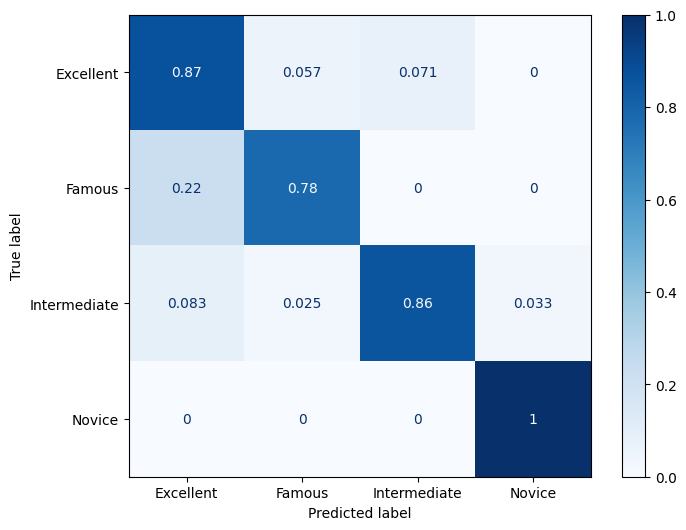

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay.from_estimator(model_pipeline, X_test, y_test, normalize='true', ax=ax, cmap='Blues')
plt.show()

In [50]:
model_pipeline.score(X_test, y_test)

0.8634146341463415

In [51]:
sampler_configs = [
    {
        'sampler':[None],# The element is bypassed
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__k_neighbors': [3, 5, 7],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },


    {
        'dim_reduction': [TSNE()],
        'dim_reduction__n_components': [2, 3],
        'dim_reduction__perplexity': [30, 50, 100],
        'dim_reduction__learning_rate': [100, 200, 500]
    },
 
    {
        'dim_reduction': [SelectKBest()],
        'dim_reduction__score_func': [f_classif, f_regression],
        'dim_reduction__k': [5, 7, 10]
    },

]

classifier_configs = [
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100, 500],
        'classifier__criterion': ['gini', 'entropy'],
    },
    {
        'classifier': [OneVsOneClassifier(LinearSVC())],
        'classifier__estimator__C': [0.1, 1, 10],  # Parameters for LinearSVC base estimator
        'classifier__estimator__max_iter': [1000]  # Additional parameters for LinearSVC
    },
    {
        'classifier': [OneVsRestClassifier(LinearSVC())],
        'classifier__estimator__C': [0.1, 1, 10],  # Parameters for LinearSVC base estimator
        'classifier__estimator__max_iter': [1000]  # Additional parameters for LinearSVC
    }
]


here we bild a list of all the possible combinations to be passed to the RandomizedSearchCV

In [52]:
all_configs = [dict(itertools.chain(*(e.items() 
for e in configuration))) 
for configuration in 
itertools.product(sampler_configs,dim_reduction_configs,classifier_configs)]

In [53]:
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 60'

In [81]:
all_configs[8:10]

[{'sampler': [None],
  'dim_reduction': [LinearDiscriminantAnalysis()],
  'classifier': [KNeighborsClassifier()],
  'classifier__n_neighbors': [3, 5, 7, 9]},
 {'sampler': [None],
  'dim_reduction': [LinearDiscriminantAnalysis()],
  'classifier': [RandomForestClassifier()],
  'classifier__n_estimators': [10, 50, 100, 500],
  'classifier__criterion': ['gini', 'entropy']}]

### Instantiating the __inner loop__ for the model selection with nested cross validation

In [55]:
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2, #2 fold cross-validation
    scoring= suited_score
)

while the __cross validate__ method constitutes the __outer loop__

In [56]:
scores = cross_validate(rs, X_train, y_train, scoring = suited_score, cv=5, return_estimator=True, verbose=3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

[CV] END ......................................., score=0.982 total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/

[CV] END ......................................., score=0.975 total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

[CV] END ......................................., score=0.987 total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

[CV] END ......................................., score=0.958 total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

[CV] END ......................................., score=0.988 total time=   3.5s


Here we print the __5 best estimators__ according to our previously chosen scoring metrics

In [57]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

None
SelectKBest(k=5)
RandomForestClassifier(criterion='entropy') {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.981781226903178
----------
RandomOverSampler(sampling_strategy='minority')
SelectKBest(k=7)
RandomForestClassifier(n_estimators=10) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, '

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train).predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)

    if suited_score == 'f1_micro':
        score_train = f1_score(y_train, pred_train, average= 'micro')
        score_test = f1_score(y_test, pred_test, average = 'micro')

    if suited_score == 'accuracy':
        score_train = accuracy_score(y_train, pred_train)
        score_test = accuracy_score(y_test, pred_test)
    if    suited_score == 'f1_macro':
        score_train = f1_score(y_train, pred_train, average= 'macro')
        score_test = f1_score(y_test, pred_test, average = 'macro')
    if suited_score == 'f1_weighted':
        score_train = f1_score(y_train, pred_train, average= 'weighted')
        score_test = f1_score(y_test, pred_test, average = 'weighted')
    print(f'Accuracy on training set: {score_train:.4f}, Accuracy on test set: {score_test:.4f}')

Accuracy on training set: 1.0000, Accuracy on test set: 0.9762
Accuracy on training set: 0.9988, Accuracy on test set: 0.9713
Accuracy on training set: 1.0000, Accuracy on test set: 0.9659
Accuracy on training set: 0.9988, Accuracy on test set: 0.9659
Accuracy on training set: 0.9988, Accuracy on test set: 0.9712


### Now that we know the best combination we can define a new IMBPipeline 

In [59]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('dim_reduction',SelectKBest(k=5)),
    ('classifier',RandomForestClassifier(n_estimators=500))
])

Below we perform __hyperparameter optimization__ with RandomizedSearchCV

In [60]:
parameters = {
    'classifier__bootstrap': [True],  # Boolean parameter, no range needed
    'classifier__ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],  
    'classifier__class_weight': [None, 'balanced'],  
    'classifier__criterion': ['gini', 'entropy'], # for evaluating impurity
    'classifier__max_depth': [None, 10, 20, 30],  # Varying values for max_depth
    'classifier__max_features': ['sqrt', 'log2', None, 0.5],  #number of features to consider at each split
    'classifier__max_leaf_nodes': [None, 50, 100, 150],  # Varying values for max_leaf_nodes
    'classifier__max_samples': [None, 0.5, 1000],  # Number of samples to use for training each tree 
    'classifier__min_impurity_decrease': [0.0, 0.1, 0.2],  # Varying values for min_impurity_decrease
    'classifier__min_samples_leaf': [1, 2, 5],  # Varying values for min_samples_leaf
    'classifier__min_samples_split': [2, 5, 10],  # Varying values for min_samples_split
    'classifier__min_weight_fraction_leaf': [0.0],  
    'classifier__n_estimators': [50, 100, 200, 500],  # Varying values for n_estimators
    'classifier__n_jobs': [None, -1, 1, 2],  #Number of computational cores to be used
    'classifier__oob_score': [False],  # Boolean parameter, no range needed
    'classifier__random_state': [None],  # No range needed
    'classifier__verbose': [0],  # Fixed value
    'classifier__warm_start': [False]  # Boolean parameter, no range needed
}


In [61]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = parameters,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring=suited_score
)

### Finally we fit the best pipeline with the optimized parameters

In [62]:
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Publishing '
                                                                                'Year']),
                                                                              ('BName_Author_LCode_Genre',
                                                                               Pipeline(steps=[('fill',
                                                                                                SimpleImputer(strategy='most_frequent'))...
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         5],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__min_weight_fraction_leaf': [0.0],
                                        'classifier__n_estimators': [50, 100,
                                                                     200, 500],
                                        'classifier__n_jobs': [None, -1, 1, 2],
                                        'classifier__oob_score': [False],
                                        'classifier__random_state': [None],
                                        'classifier__verbose': [0],
                                        'classifier__warm_start': [False]},
                   scoring='f1_weighted')

In [63]:
rs_best.best_params_ #in order to display the parameters that were chosen by the RandomSearch

{'classifier__warm_start': False,
 'classifier__verbose': 0,
 'classifier__random_state': None,
 'classifier__oob_score': False,
 'classifier__n_jobs': None,
 'classifier__n_estimators': 50,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__min_samples_split': 2,
 'classifier__min_samples_leaf': 5,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__max_samples': 0.5,
 'classifier__max_leaf_nodes': 150,
 'classifier__max_features': None,
 'classifier__max_depth': None,
 'classifier__criterion': 'gini',
 'classifier__class_weight': 'balanced',
 'classifier__ccp_alpha': 0.0,
 'classifier__bootstrap': True}

In [64]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Publishing Year']),
                                                 ('BName_Author_LCode_Genre',
                                                  Pipeline(steps=[('fill',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Book Name', 'Author',
                                                   'language_code',...
                                                   'units sold']),
                                                 ('GSales',
                                                  Pipeline(steps=[('fill',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['gross sales'])],
                                   verbose_feature_names_out=False)),
                ('dim_reduction', SelectKBest(k=5)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features=None, max_leaf_nodes=150,
                                        max_samples=0.5, min_samples_leaf=5,
                                        n_estimators=50))])

In [83]:
if suited_score == 'f1_micro':   
        print(f1_score(y_test, rs_best.best_estimator_.predict(X_test), average = 'micro'))
if suited_score == 'accuracy':
        print(f1_score(y_test, rs_best.best_estimator_.predict(X_test)))
if    suited_score == 'f1_macro':
        print(f1_score(y_test, rs_best.best_estimator_.predict(X_test), average = 'macro'))
if suited_score == 'f1_weighted':
        print(f1_score(y_test, rs_best.best_estimator_.predict(X_test), average = 'weighted'))

0.9761969944951808


### We display again the confusion matrix and notice the differnces in performance with the initially defined IMBPipeline

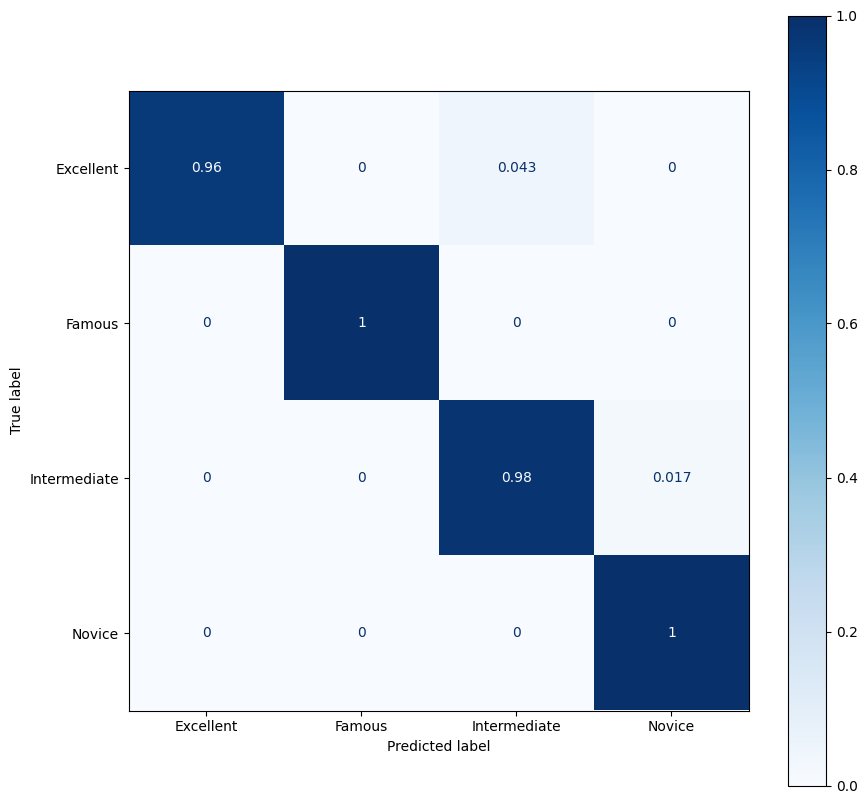

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm_display = ConfusionMatrixDisplay.from_estimator(rs_best, X_test, y_test, normalize='true', ax=ax, cmap='Blues')
plt.show()

In [67]:
cls = rs_best.best_estimator_

# More Visualization

we display the validation and learning curve of the best model to visualize its performance but also to identify potential issues, and making informed decisions to improve model performance.

In [68]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = suited_score,
                                                       shuffle = False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings

Here below the __learning curve__

(0.6, 1.05)

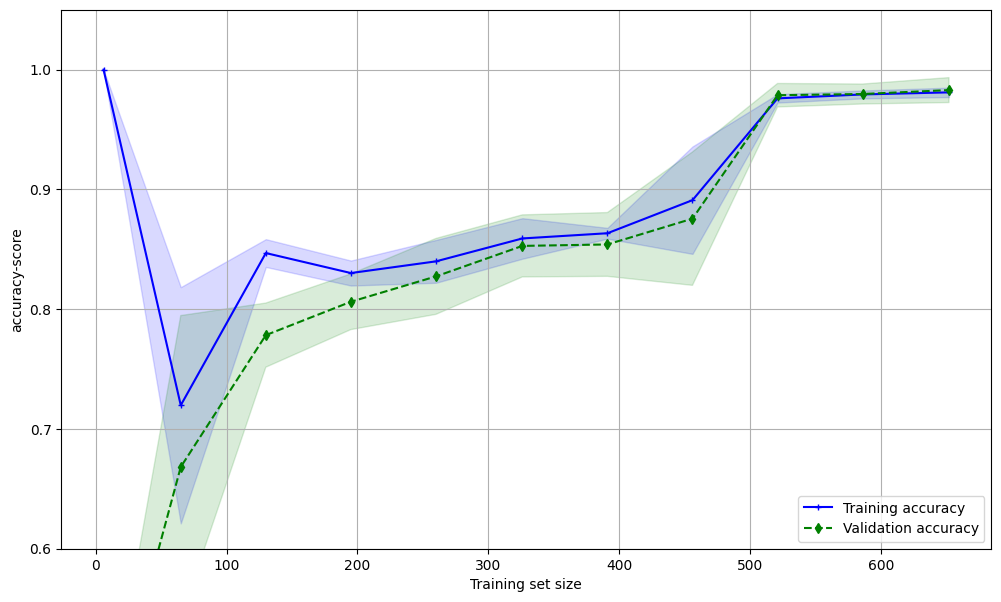

In [69]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('accuracy-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.05])

In [70]:
range_n_estimators = [10, 50, 100, 200, 500]
train_scores, test_scores = validation_curve(
    cls,
    X_train,
    y_train,
    param_name='classifier__n_estimators',
    param_range=range_n_estimators,
    cv=5,
    n_jobs=-1
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unkno

while here is the __validation curve__

In [1]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_n_estimators, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_n_estimators,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_n_estimators, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_n_estimators,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('number of estimators')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
ax.set_xscale('log')
ax.grid(True)
plt.show()

NameError: name 'np' is not defined